# Logistic regression; Comparison between MSE and binary cross-entropy

This webpage explores binary cross-entropy loss and MSE loss for logistic regression. The aim is to demonstrate why MSE is a poor choice for this model. Our model can be diagrammatically depicted as follows (for a single feature):

<img src="https://alexskillen.github.io/AERO40041/images/Logistic_regression/LogisticRegression.png" alt="drawing" width="400"/>

The feature, $x$, is multiplied by weight $w$, and added to bias $b$ to give the activation potential $n$. This is then passed into the sigmoid function (denoted $\sigma$) to give the output $a$ (often denoted as $\hat{y}$). The model form is therefore $\hat{y} = \sigma(wx+b)$. 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import Markdown

In [18]:
def sigmoid(z):
    if( z>=0. ):
        return 1. / (1. + np.exp(-z))
    else:
        return np.exp(z) / (1. + np.exp(z))

In [19]:
def d_dx_sigmoid(z):
    return sigmoid(z)*(1.-sigmoid(z))

The sigmoid function is given by
$$\sigma(n) = \frac{1}{1+e^{-n}}.$$

Its derivative is given by 
$$\sigma^\prime(n) = \sigma(n) (1-\sigma(n)).$$

We plot the sigmoid function and its derivative below:

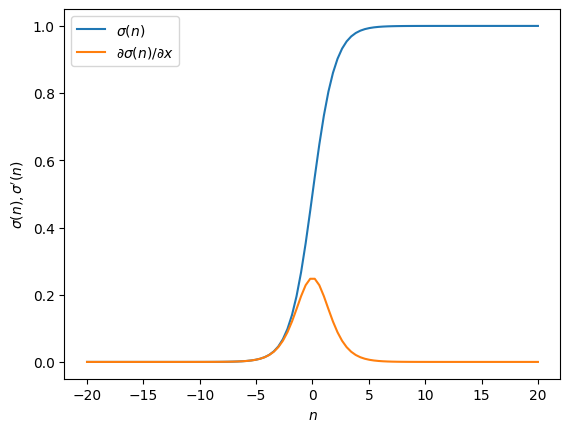

In [20]:
z = np.linspace(-20, 20, 100)

try:
    plt.style.use('seaborn')
except:
    _

sigz = [sigmoid(x) for x in z]
dsigz = [d_dx_sigmoid(x) for x in z]

plt.plot(z, sigz, label=r'$\sigma(n)$')
plt.plot(z, dsigz, label=r'$\partial \sigma(n) / \partial x$')
plt.legend()
plt.xlabel(r'$n$')
plt.ylabel(r'$\sigma(n), \sigma^\prime(n)$')

plt.show()

In [21]:
def MSEloss(x, y, w, b):
    return (y - sigmoid(w*x+b))**2

We will consider a toy problem with one data sample; $x=1, y=0$. From the plot above, it is apparent that the solution to this is to make the input to the sigmoid function, $n=wx+b$, a large negative value (note the sigmoid function asymptotes towards zero at negative values of its input, so the more negative $n$ is, the better). This can be achieved by making both $b$ and $w$ large negative values.

We will train the model with gradient descent. To do so, we need the gradient of the loss function with respect to the parameters. Using the chain rule, this can be expressed as the product of three partial derivatives, each of which can be found easily:

$$\frac{\partial \mathcal{L}}{\partial w} = \frac{\partial \mathcal{L}}{\partial a}\frac{\partial a}{\partial n}\frac{\partial n}{\partial w}$$

$$\frac{\partial \mathcal{L}}{\partial b} = \frac{\partial \mathcal{L}}{\partial a}\frac{\partial a}{\partial n}\frac{\partial n}{\partial b}$$

If using a MSE loss, the partial derivative $\partial \mathcal{L} / \partial a$ can be expressed as 

$$\frac{\partial \mathcal{L}}{\partial a} = -2(y-\hat{y})$$

where $y$ is the label (zero in this case), and $\hat{y} ~ (\equiv a)$ is the model's current prediction. 

The partial derivative $\partial a / \partial n$ is the gradient of the sigmoid function at $n$, i.e. 

$$\frac{\partial a}{\partial n} = \sigma^\prime(n)$$.

Finally, since $n=wx+b$ the derivatives $\partial n / \partial w$ and $\partial n / \partial b$ are equal to $x$ and $1$, respectively (since we have only one data point).

In [22]:
def update_wb( x, y, w, b, alpha=0.1 ):
    a = sigmoid(w*x+b)
    dl_da = -2.*(y - a)
    da_dn = d_dx_sigmoid(w*x+b)
    dn_dw = x

    dn_db = 1.

    w = w - alpha * (dl_da*da_dn*dn_dw)
    b = b - alpha * (dl_da*da_dn*dn_db)

    return w, b, dl_da, da_dn, dn_dw

In the plots below, we show how the MSE loss changes with the evolution of the parameters $w$ and $b$ updated by gradient descent with a fixed learning rate of $0.1$. The initial values of $w$ and $b$ can be controlled with the sliders. 

The bottom row of plots shows the individual gradient terms $\partial \mathcal{L} / \partial a$, $\partial a / \partial n$ and $\partial n / \partial w$. Their product gives the gradient of the loss with respect to the parameter $w$, and similarly for $b$ (since in this particular case, $x=1$, the update for $b$ will be identical to that of $w$.). 

Try setting the initial values of $w$ and $b$ to $0.2$. We can see that the model predicts the value of $0.075$ after $300$ epochs. The true output is zero, so this is not too bad, but there is certainly room for improvement. 

Now try changing the initial values of the parameters to $2$. The model output after $300$ epochs is $0.12$; quite far from the target of zero. We can see from the loss plot that learning is very slow for the first 100 or so epochs. Have a think about why this might be and answer below.  

In [23]:
x = 1.
y = 0.

try:
    plt.style.use('seaborn')
except:
    _

initial_w = widgets.FloatSlider(2, min=-5, max=5.0, description='Initial w:')
initial_b = widgets.FloatSlider(2, min=-5, max=5.0, description='Initial b:')
sub = widgets.Button(description='Submit')
out = widgets.Output()

display(initial_w)
display(initial_b)
display(sub, out)

def train(b):
    clear_outputs()
    with out:
        epochs=300
        w=initial_w.value
        b=initial_b.value
        L_history = []
        w_history = []
        b_history = []
        dlda_history = []
        dadn_history = []
        dndw_history = []
    
        for _ in range(int(epochs)):
            loss = MSEloss( x, y, w, b )
            L_history.append(loss)
            w_history.append(w)
            b_history.append(b)
        
            w, b, dl_da, da_dn, dn_dw = update_wb( x, y, w, b )

            dlda_history.append(dl_da)
            dadn_history.append(da_dn)
            dndw_history.append(dn_dw)
        
        fig, ax = plt.subplots(2, 3, figsize=(15,10))
        ax[0][0].plot(L_history)
        ax[0][1].plot(w_history)
        ax[0][2].plot(b_history)
        ax[1][0].plot(dlda_history)
        ax[1][1].plot(dadn_history)
        ax[1][2].plot(dndw_history)

        ax[0][0].set_xlabel('epoch')
        ax[0][1].set_xlabel('epoch')
        ax[0][2].set_xlabel('epoch')
        ax[1][0].set_xlabel('epoch')
        ax[1][1].set_xlabel('epoch')
        ax[1][2].set_xlabel('epoch')

        ax[0][0].set_ylabel('MSE loss', fontsize=18)
        ax[0][1].set_ylabel('w', fontsize=18)
        ax[0][2].set_ylabel('b', fontsize=18)
        ax[1][0].set_ylabel(r'∂L/∂a', fontsize=18)
        ax[1][1].set_ylabel(r'∂a/∂n', fontsize=18)
        ax[1][2].set_ylabel(r'∂n/∂w', fontsize=18)

        print( "The Final outout:", sigmoid(w*x+b) )
        plt.show()


def clear_outputs():
    out.clear_output(wait=True)

train(sub)

sub.on_click(train)

FloatSlider(value=2.0, description='Initial w:', max=5.0, min=-5.0)

FloatSlider(value=2.0, description='Initial b:', max=5.0, min=-5.0)

Button(description='Submit', style=ButtonStyle())

Output()

-----

Why is the learning initially so slow?

In [24]:
def ans(b):
    out4.clear_output(wait=True)
    with out4:
        if( ans4.value == 'dL/da is small' ):
            display(Markdown('No.'))
        elif( ans4.value == 'da/dn is small' ):
            display(Markdown('Yes! Remember da/dn = the gradient of the sigmoid function. Look at the first plot above (the green line). If we are very far from the true answer the gradient of the sigmoid function will be near zero.'))

out4 = widgets.Output()
    
ans4 = widgets.RadioButtons(
    options=['dL/da is small', 'da/dn is small'],
    disabled=False
)

sub4 = widgets.Button(description='Submit')

display(ans4)
display(sub4, out4)

sub4.on_click(ans)

RadioButtons(options=('dL/da is small', 'da/dn is small'), value='dL/da is small')

Button(description='Submit', style=ButtonStyle())

Output()

-----

Now let's compare the binary cross-entropy loss, or Log loss. We prepare the same set of plots as before, but now the loss function is given by 

$$\mathrm{Log Loss} = \sum_{i=1}^N -y_i \ln(\hat{y}) - (1-y_i)\ln(1-\hat{y}).$$

In this toy problem, since $y$ is always zero, this reduces to 

$$\mathrm{Log Loss} = - \ln(1-\hat{y}) ~~~ \mathrm{or} ~~~ \mathcal{L} = - \ln(1-a).$$

The partial derivative $\partial \mathcal{L} / \partial a$ is now given by $1/(1-a)$. 

Initialise the parameters both to $2$ and we observe an output of $0.018$ after $300$ epochs with the same learning rate of $0.1$. This is much closer to the target value than that found with MSE! Have a think why, and answer below.

In [25]:
def CEloss(x, y, w, b):
    return -(1.)*np.log(1.-sigmoid(w*x+b)+1e-5)

In [26]:
def update_wb_CE( x, y, w, b, alpha=0.1 ):
    a = sigmoid(w*x+b)
    dl_da = (1.)/(1.-a) 
    da_dn = d_dx_sigmoid(w*x+b)
    dn_dw = x

    dn_db = 1.

    w = w - alpha * (dl_da*da_dn*dn_dw)
    b = b - alpha * (dl_da*da_dn*dn_db)

    return w, b, dl_da, da_dn, dn_dw

In [27]:
x = 1.
y = 0.

try:
    plt.style.use('seaborn')
except:
    _

initial_w2 = widgets.FloatSlider(2, min=-5, max=5.0, description='Initial w:')
initial_b2 = widgets.FloatSlider(2, min=-5, max=5.0, description='Initial b:')
sub2 = widgets.Button(description='Submit')
out2 = widgets.Output()

display(initial_w2)
display(initial_b2)
display(sub2, out2)

def train(b):
    clear_outputs2()
    with out2:
        epochs=300
        w=initial_w2.value
        b=initial_b2.value
        L_history = []
        w_history = []
        b_history = []
        dlda_history = []
        dadn_history = []
        dndw_history = []
    
        for _ in range(int(epochs)):
            loss = CEloss( x, y, w, b )
            L_history.append(loss)
            w_history.append(w)
            b_history.append(b)
        
            w, b, dl_da, da_dn, dn_dw = update_wb_CE( x, y, w, b )

            dlda_history.append(dl_da)
            dadn_history.append(da_dn)
            dndw_history.append(dn_dw)
        
        fig, ax = plt.subplots(2, 3, figsize=(15,10))
        ax[0][0].plot(L_history)
        ax[0][1].plot(w_history)
        ax[0][2].plot(b_history)
        ax[1][0].plot(dlda_history)
        ax[1][1].plot(dadn_history)
        ax[1][2].plot(dndw_history)

        ax[0][0].set_xlabel('epoch')
        ax[0][1].set_xlabel('epoch')
        ax[0][2].set_xlabel('epoch')
        ax[1][0].set_xlabel('epoch')
        ax[1][1].set_xlabel('epoch')
        ax[1][2].set_xlabel('epoch')

        ax[0][0].set_ylabel('CE loss', fontsize=18)
        ax[0][1].set_ylabel('w', fontsize=18)
        ax[0][2].set_ylabel('b', fontsize=18)
        ax[1][0].set_ylabel(r'∂L/∂a', fontsize=18)
        ax[1][1].set_ylabel(r'∂a/∂n', fontsize=18)
        ax[1][2].set_ylabel(r'∂n/∂w', fontsize=18)

        print( "The Final outout:", sigmoid(w*x+b) )
        plt.show()

        return dlda_history, dadn_history

def clear_outputs2():
    out2.clear_output(wait=True)

dlda_history, dadn_history = train(sub)
sub2.on_click(train)

FloatSlider(value=2.0, description='Initial w:', max=5.0, min=-5.0)

FloatSlider(value=2.0, description='Initial b:', max=5.0, min=-5.0)

Button(description='Submit', style=ButtonStyle())

Output()

----------

Why is the initial learning now so much better?

In [28]:
def ans(b):
    out3.clear_output(wait=True)
    with out3:
        if( ans3.value == 'dL/da is large' ):
            display(Markdown('Yes! Even though da/dn remains small, dL/da will be large. In this toy problem, we have  dL/da = 1/(1-a). If a is close to 1 (i.e. a very bad prediction far from the target of zero), the denominator will be small, and the derivative will therefore be large. When multiplied by the small value of the gradient of the sigmoid their product will be sufficiently large for effective learning.'))
            display(Markdown('Below is a plot of the product of dL/da and da/dn with a binary cross-entropy loss and initial values of w and b set to 2; Note it is order 1 at the start of training'))
            plt.plot([a*b for a,b in zip(dlda_history,dadn_history)])
            plt.ylabel(r'∂L/∂a * ∂a/∂n')
            plt.xlabel('epoch')
            plt.show()
        elif( ans3.value == 'da/dn is large' ):
            display(Markdown('No. Remember da/dn = the gradient of the sigmoid function. Look at the first plot above (the orange line). If we are very far from the true answer the gradient of the sigmoid function will be near zero.'))

out3 = widgets.Output()
    
ans3 = widgets.RadioButtons(
    options=['dL/da is large', 'da/dn is large'],
    disabled=False
)

sub3 = widgets.Button(description='Submit')

display(ans3)
display(sub3, out3)

sub3.on_click(ans)

RadioButtons(options=('dL/da is large', 'da/dn is large'), value='dL/da is large')

Button(description='Submit', style=ButtonStyle())

Output()

----

Even though this is a toy problem, the same conclusions hold for more complex data and in higher dimensional space. 

Copyright Alex Skillen, UoM (CC BY-NC 4.0)